<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_partido             380 non-null    int64 
 1   temporada              380 non-null    int64 
 2   fecha                  380 non-null    object
 3   equipo_local           380 non-null    object
 4   equipo_visita          380 non-null    object
 5   goles_local            380 non-null    int64 
 6   goles_visita           380 non-null    int64 
 7   xg_local               0 non-null      object
 8   xg_visita              0 non-null      object
 9   posesion_local         0 non-null      object
 10  posesion_visita        0 non-null      object
 11  amarillas_local        380 non-null    int64 
 12  amarillas_visita       380 non-null    int64 
 13  rojas_local            380 non-null    int64 
 14  rojas_visita           380 non-null    int64 
 15  tiros_local            

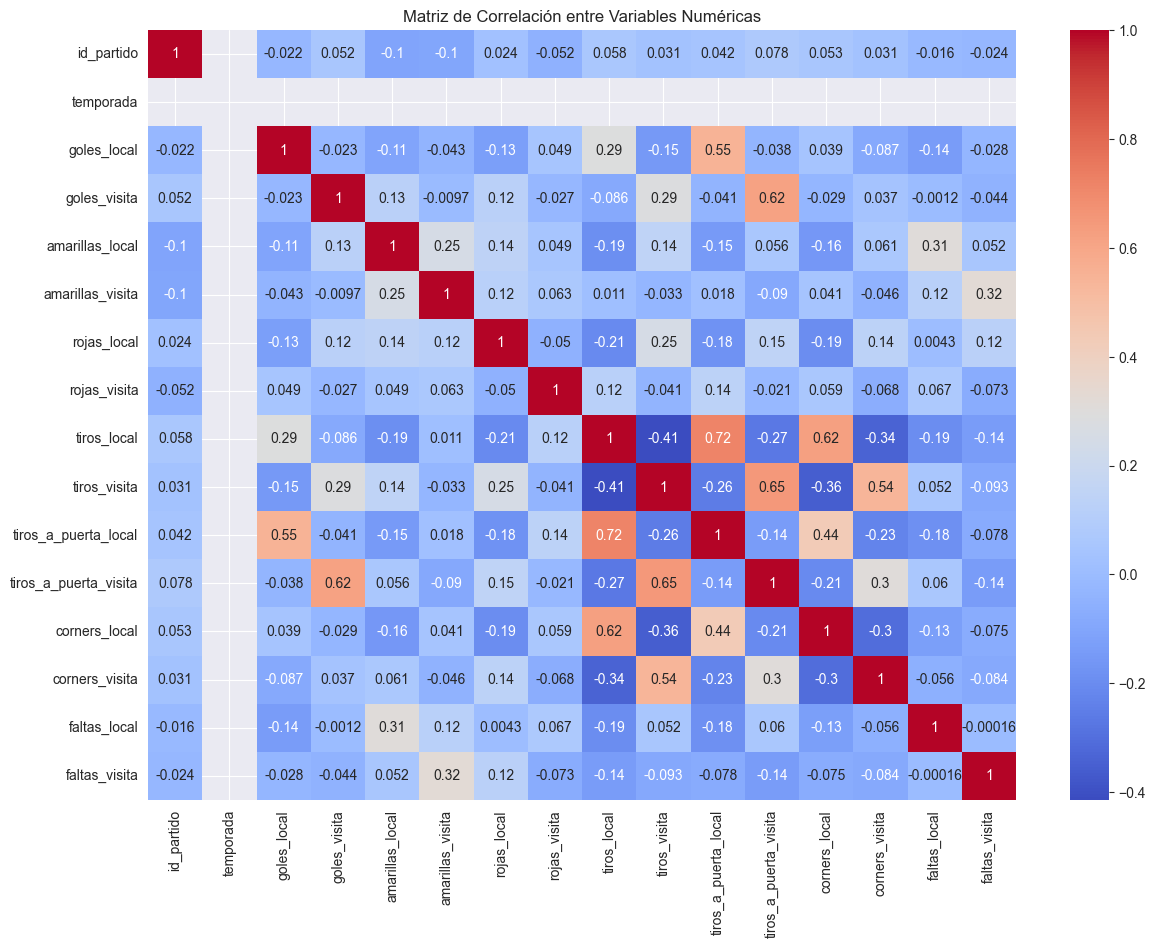

In [1]:
##Procesos Eda
###Importar librerias
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mostrar gráficos en el notebook
%matplotlib inline

###Conectar a base de datos y leer datos
# Conexión a la base de datos
conn = sqlite3.connect("../data/raw/laliga.db")

# Leer toda la tabla partidos
df = pd.read_sql_query("SELECT * FROM partidos", conn)

# Cerrar la conexión
conn.close()

# Ver las primeras filas
df.head()

###Ver estructura de datos
df.info()

###Limpiar columnas vacias
# Eliminar columnas que tienen todos los valores en None (por ejemplo xG o posesión si están vacíos)
df = df.dropna(axis=1, how='all')

# Ver columnas restantes
df.columns

###estadisticas
df.describe()

###Correlaciones
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()
